<br>
<center style="color:#180090; font-weight: bold; font-size: 3em">Esercitazione 1</center><br>
<center style="color:#555555; font-size: 2em; margin-bottom: 0.2cm;">Francesco Righini</center>
<center style="color:#555555; font-size: 1.5em">(931984)</center>

In [1]:
# importazione librerie
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math
import warnings
warnings.filterwarnings('ignore')
params = {'legend.fontsize': 'x-large', 'figure.figsize': (10, 6), 'axes.labelsize': 'x-large', 'axes.titlesize':'xx-large', 'xtick.labelsize':'x-large', 'ytick.labelsize':'x-large'}
plt.rcParams.update(params)

<div style="color:#180090; font-size: 0.9cm; padding-top: 1em; font-weight:bold;">Esercizio 1</div>

<div style="color:#333333; font-size: 0.43cm; padding: 1em; background-color:#F5F5F5">Testare il generatore di numeri pseudocasuali preconfezionato su Ariel; in particolare, la funzione $\texttt{Rannyu( )}$ che restituisce valori uniformemente distribuiti tra 0 e 1.</div>

<div style="color:#555555; font-size: 0.7cm; font-weight:bold;">Punto 1</div>

<div style="color:#333333; font-size: 0.43cm; padding: 1em; background-color:#F5F5F5">Valutare il valor medio con relativa incertezza della distribuzione uniforme tra 0 e 1 in funzione del numero di blocchi utilizzati.</div>

<div style="font-size: 0.43cm;">Il valor medio della distribuzione è atteso essere
$$\langle r \rangle = \int_0^1 r\,dr = \frac{1}{2}.$$
<br>
Per valutare la media della sequenza di numeri pseudo-casuali prodotti dal generatore si è diviso il flusso di $M$ valori in $N$ blocchi e si è valutata la media $r_i$ per ogni blocco (costituito da $M/N$ valori).<br>
Per ogni numero $k\in[2,\dots,N]$ di blocchi considerati (con 1 blocco solo non ha senso fare statistica), si possono calcolare la media cumulativa e la relativa incertezza come
$$ \langle r \rangle_k = \frac{1}{k}\sum_{i=1}^k r_i \qquad
\sigma_{\langle r \rangle_k} = \frac{1}{k}\sum_{i=1}^k r^2_i - \left(\frac{1}{k}\sum_{i=1}^k r_i\right)^2.$$
<br> 
Nella fattispecie si sono assegnati i valori $M=10^5$, $N=10^2$.<br>
</div>

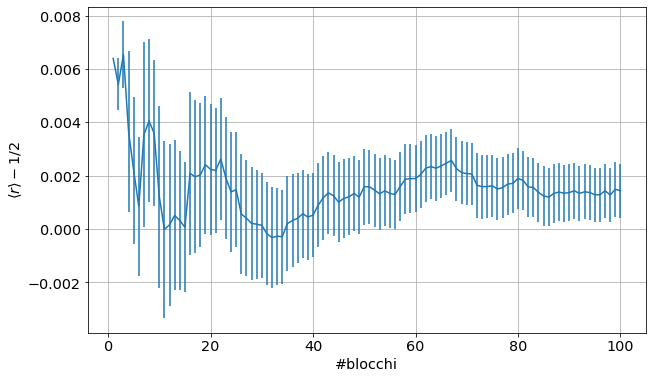

In [2]:
media, sigma_media = np.loadtxt("results/1_1.dat", usecols=(0,1), delimiter=' ', unpack='true')
valor_vero = 0.5
x = np.arange(len(media))+1
plt.errorbar(x,media-valor_vero,yerr=sigma_media)
plt.xlabel('#blocchi')
plt.ylabel(r'$\langle r \rangle - 1/2$')
plt.grid(True)
plt.show()

<div style="color:#555555; font-size: 0.7cm; font-weight:bold;">Punto 2</div>

<div style="color:#333333; font-size: 0.43cm; padding: 1em; background-color:#F5F5F5">Valutare la varianza con relativa incertezza della distribuzione uniforme tra 0 e 1 in funzione del numero di blocchi utilizzati.</div>

<div style="font-size: 0.43cm;">L'errore quadratico medio della distribuzione è atteso essere
$$ \sigma^2 = \langle\left(r-\langle r\rangle\right)^2\rangle = \int_0^1 \left(r-\frac{1}{2}\right)^2 dr = \frac{1}{12}.$$
<br>
Prendendo i valori $r_i$ del punto 1, si è calcolata la $\sigma^2$ cumulativa con relativa incertezza per ogni gruppo di $k$ blocchi come
$$ \sigma^2_k = \frac{1}{k}\sum_{i=1}^k (r_i-\langle r \rangle)^2 \qquad
\sigma_{\sigma^2_k} = \frac{1}{k}\sum_{i=1}^k (r_i-\langle r \rangle)^4 - \left(\frac{1}{k}\sum_{i=1}^k (r_i-\langle r \rangle)^2\right)^2.$$
</div>


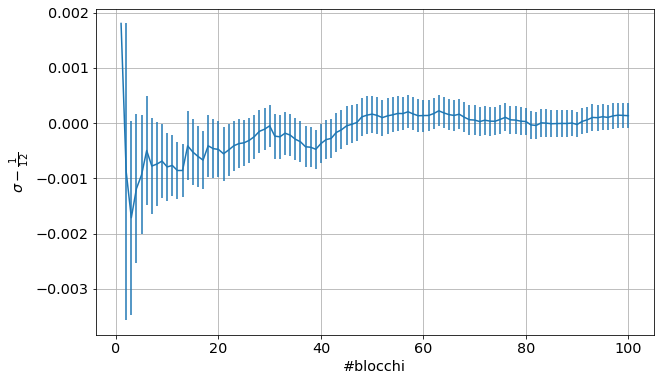

In [3]:
media, sigma_media = np.loadtxt("results/1_2.dat", usecols=(0,1), delimiter=' ', unpack='true')
valor_vero = 1/12
x = np.arange(len(media))+1
plt.errorbar(x,media-valor_vero,yerr=sigma_media)
plt.xlabel('#blocchi')
plt.ylabel(r'$\sigma - \frac{1}{12}$')
plt.grid(True)
plt.show()

<div style="color:#555555; font-size: 0.7cm; font-weight:bold;">Punto 3</div>

<div style="color:#333333; font-size: 0.43cm; padding: 1em; background-color:#F5F5F5">Eseguire il test del $\chi^2$ per la distribuzione uniforme di valori tra 0 e 1.</div>

<div style="font-size: 0.43cm;">Si è diviso l'intervallo $[0,1]$ in $n$ sottointervalli di lunghezza $1/n$. La probabilità che un valore uniformemente distribuito tra 0 e 1 cada in un particolare sottointervallo è quindi $1/n$. Pertanto il numero di valori attesi per intervallo dopo $T$ valori estratti in modo uniforme è
<br><br>
$$t_\text{exp} = \dfrac{T}{n}.$$
<br>
L'espressione di $\chi^2$ è<br>
$$ \chi^2 = \sum_{i=1}^n \dfrac{\left(t_i-t_\text{exp}\right)^2}{t_\text{exp}}.$$
<br>
Usando i valori $n=100$ e $T=10000$ il numero di valori attesi per intervallo è $t_\text{exp} = 100$.<br>
Il calcolo del $\chi^2$ è eseguito 100 volte.
</div>

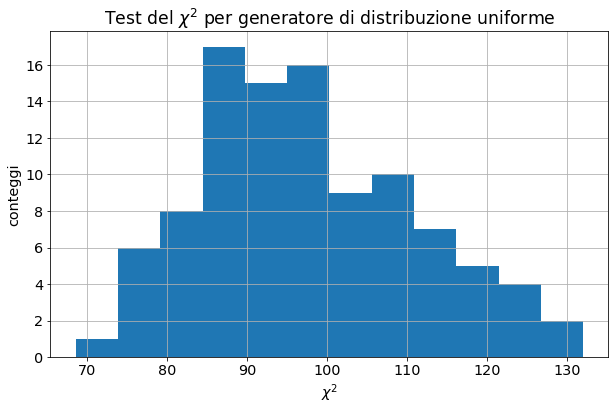

In [4]:
chi = np.loadtxt("results/1_3.dat", delimiter=' ', unpack='true')
# the histogram of the data
n_bins = 12

n, bins, patches = plt.hist(chi, n_bins)

plt.xlabel(r'$\chi^2$')
plt.ylabel('conteggi')
plt.title(r'Test del $\chi^2$ per generatore di distribuzione uniforme')
plt.grid(True)

plt.show()

<div style="font-size: 0.43cm;">Dall'istogramma si nota che la distribuzione di chi-quadro è piccata in un intorno di 100, pertanto il generatore di valori uniformemente distribuiti è buono e la distribuzione iniziale è una buona approssimazione della distribuzione uniforme.
</div>

<div style="color:#180090; font-size: 0.9cm; padding-top: 1em; font-weight:bold;">Esercizio 2</div>

<div style="color:#333333; font-size: 0.43cm; padding: 1em; background-color:#F5F5F5"> Estendere il generatore di numeri casuali.</div>

<div style="color:#555555; font-size: 0.7cm; font-weight:bold;">Punto 1</div>

<div style="color:#333333; font-size: 0.43cm; padding: 1em; background-color:#F5F5F5">Aggiungere due generatori di numeri pseudo-casuali secondo distribuzioni esponenziale $p(x) = \lambda e^{-\lambda x}$ con $x\in[0,+\infty]$ e lorentziana $p(x) = \frac{1}{\pi}\frac{\Gamma}{(x-\mu)^2+\Gamma^2}$ con $x\in[-\infty,+\infty]$.</div>

<div style="color:#555555; font-size: 0.7cm; font-weight:bold;">Punto 2</div>

<div style="color:#333333; font-size: 0.43cm; padding: 1em; background-color:#F5F5F5"> Riempire quattro istogrammi, uno per ogni valore di $N \in \{1,2,10,100\}$, con $M=10^4$ valori <br><br>
$$ S_N = \frac{1}{N}\sum_{i=1}^N r_i$$
per ognuna relle distribuzioni :
<ul><li> $r_i$ uniformemente distribuiti tra 0 e 1;
<li> $r_i$ distribuiti secondo $p(x) = e^{-x}$;
<li> $r_i$ distribuiti secondo $p(x) = \frac{1}{\pi}\frac{1}{x^2+1}$.</ul>
</div>

<div style="color:#333333; font-size: 0.43cm; padding: 1em; background-color:#F5F5F5">Notare che si possono sovrapporre delle gaussiane agli istogrammi per distribuzioni uniformi ed esponenziali, mentre non per la distribuzione lorenziana, dove è necessaria una curva di Lorentz.
</div>

In [5]:
dati = [np.loadtxt("results/2_unif.dat", delimiter=' ', usecols=(0,1,2,3),unpack='true'), np.loadtxt("results/2_exp.dat", delimiter=' ', usecols=(0,1,2,3),unpack='true'), np.loadtxt("results/2_lor.dat", delimiter=' ', usecols=(0,1,2,3),unpack='true')]
n_bins = [[80, 120, 140, 170],[80, 120, 140, 170],[80, 120, 140, 170]];

titolo = [["valori uniformi", "media su 2 valori uniformi", "media su 10 valori uniformi", "media su 100 valori uniformi"], ["valori esponenziali", "media su 2 valori esponenziali", "media su 10 valori esponenziali", "media su 100 valori esponenziali"], ["valori lorenziani", "media su 2 valori lorenziani", "media su 10 valori lorenziani", "media su 100 valori lorenziani"]];

In [6]:
def f_gauss(x,a,b,c):  # defining the fitting gaussian function
    return (a * np.exp(-b*(x-c)**2))

def f_lorentz(x,a,g,m):  # defining the fitting lorentz function
    return (a * g**2 / (1+ (x/g)**2))

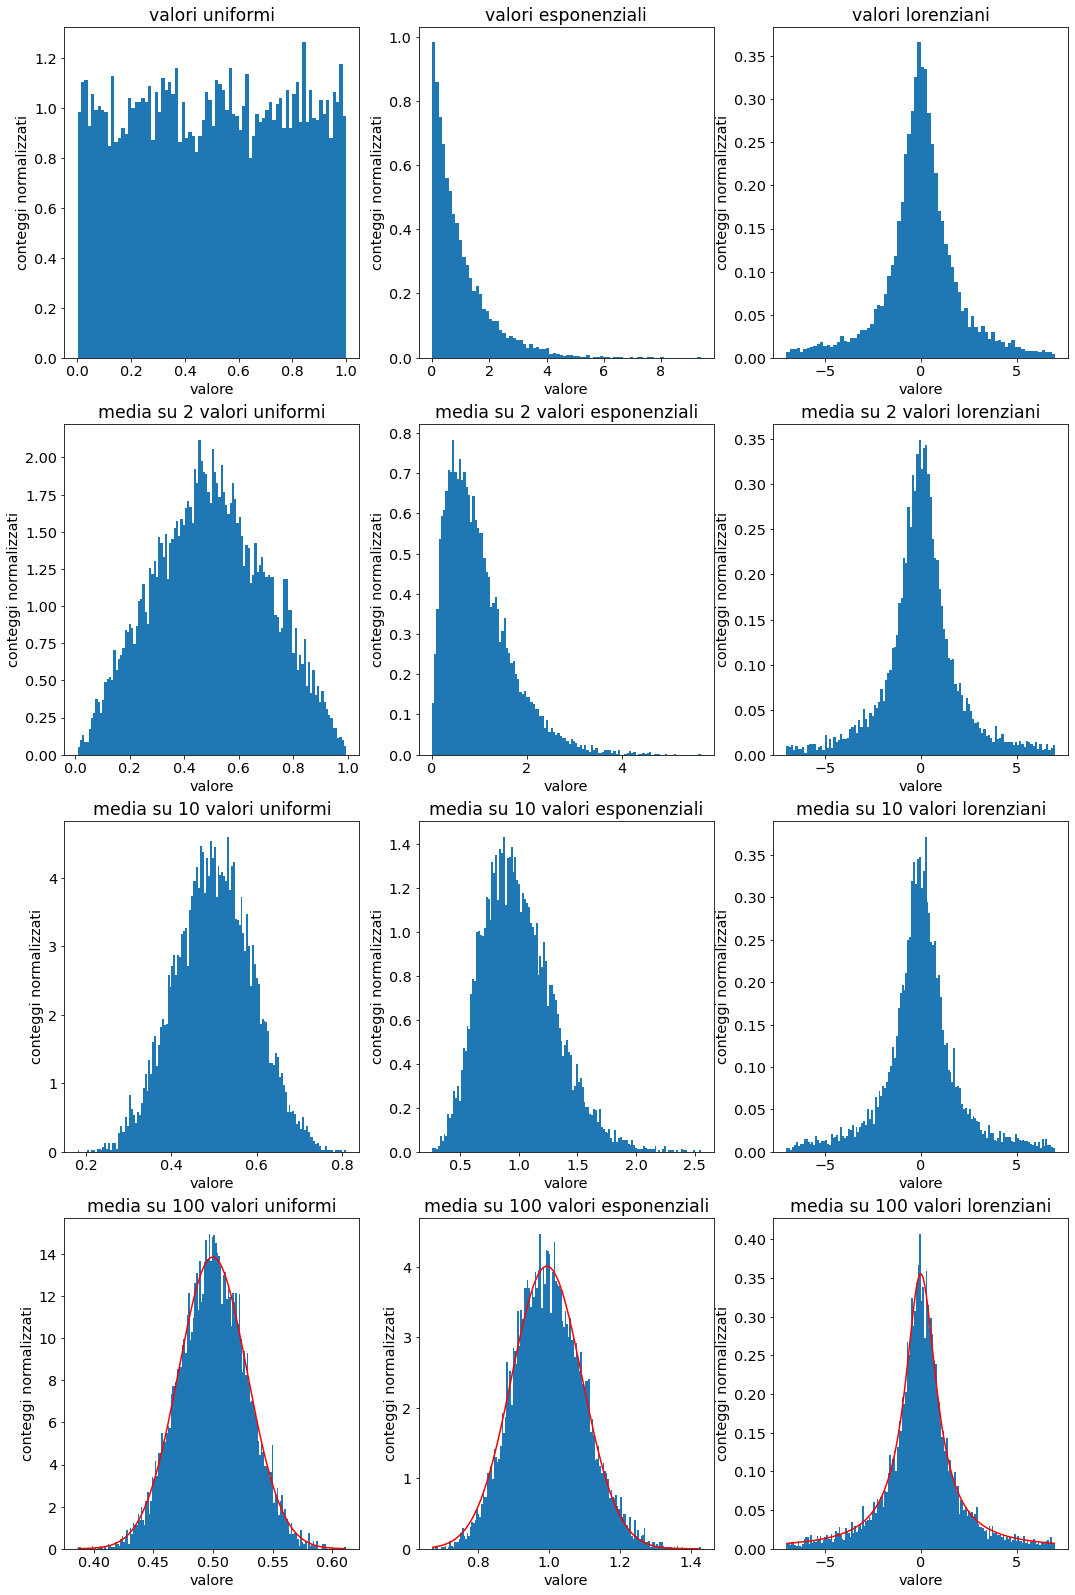

In [7]:
from scipy.optimize import curve_fit

fig, axs = plt.subplots(4,3,figsize=(18,28))

for k in range(3):
    for i in range(4):
        ax = axs.flat[3*i+k]
        if (k == 2):
            altezze, bins, patches = ax.hist(dati[k][i], n_bins[k][i], range=(-7,7), density=True)
            if (i==3):
                #fitta con lorenziana
                binscenters = np.array([0.5 * (bins[i] + bins[i+1]) for i in range(len(bins)-1)])
                popt, _ = curve_fit(f_lorentz, xdata=binscenters, ydata=altezze, p0=[1, 1, 0 ])
                ax.plot(binscenters, f_lorentz(binscenters, *popt), color='red')
        else:
            altezze, bins, patches = ax.hist(dati[k][i], n_bins[k][i], density=True)
            if (i==3):
                #fitta con gaussiana
                binscenters = np.array([0.5 * (bins[i] + bins[i+1]) for i in range(len(bins)-1)])
                popt, _ = curve_fit(f_gauss, xdata=binscenters, ydata=altezze, p0=[1, 0.5, 0.03 ])
                ax.plot(binscenters, f_gauss(binscenters, *popt), color='red')

        ax.set(xlabel='valore', ylabel='conteggi normalizzati', title = titolo[k][i])

<div style="font-size: 0.43cm;">Si osserva che i fit gaussiani hanno ottimo successo per le distribuzioni delle medie su un elevato numero (nell'esempio $N=100$) di valori distribuiti sia uniformemente che secondo una legge esponenziale. Valori originariamente estratti secondo una distribuzione Lorentziana forniscono invece distribuzioni Lorentziane sotto operazione di media per qualsiasi $N$.<br>
La distribuzione gaussiana è pertanto l'attrattore delle distribuzioni uniformi ed esponenziali, mentre la distribuzione lorentziana, essendo essa stessa attrattore, non può avere un attrattore diverso da se stessa.
</div>

<p style="color:#180090; font-size: 0.9cm; padding-top: 1em; font-weight:bold;">Esercizio 3</p>

<div style="color:#333333; font-size: 0.43cm; padding: 1em; background-color:#F5F5F5">Simulare l'esperimento dell'ago di Buffon: un ago di lunghezza $L$ viene lanciato su un piano orizzontale a strisce di larghezza $d>L$. La probabilità che l'ago intersechi una linea di separazione tra strisce è data dalla formula analitica
<br><br>
$$ P = \dfrac{2L}{\pi d}.$$
<br>
Simulando questo esperimento un numero elevato di volte si può avere una stima numerica della probabilità
<br><br>
$$P = \lim_{N_\text{thr}\to +\infty}\frac{N_\text{hit}}{N_\text{thr}}$$
<br>
che, confrontata con la formula analitica, può fornire una stima di $\pi$:<br><br>
$$ \pi = \lim_{N_\text{thr}\to +\infty} \dfrac{2L}{d}\dfrac{N_\text{thr}}{N_\text{hit}}.$$
</div>

<div style="font-size: 0.43cm;">Per simulare un lancio dell'ago sul piano a strisce, si può considerare una "semistriscia" (quella in cui cade il baricentro dell'ago) di larghezza $d/2$.<br><br>
Si estrae quindi da una distribuzione uniforme la distanza $r \in[0, d/2]$ tra il baricentro dell'ago e il bordo della striscia.<br><br>
L'altro parametro necessario a descrivere l'esito del lancio dell'ago è stato scelto come l'angolo che forma l'ago con la normale al bordo della striscia.<br><br>
Il desiderio è quello di prendere $\theta$ distribuito uniformemente in $[0,\frac{\pi}{2}]$. Usare però il valore di $\pi$ per calcolare $\pi$ stesso non è particolarmente elegante.
Per ottenere un angolo uniformemente distribuito in $[0,\frac{\pi}{2}]$ si prendono per ogni lancio due valori $(x,y)$ uniformemente distribuiti tra 0 e 1. Se la loro somma in quadratura è minore di 1 ($x^2+y^2<1$), il punto di coordinate $(x,y)$ sta nel quarto di cerchio unitario, dove gli angoli dati da $\text{arctg}\left(\frac{y}{x}\right)$ sono uniformemente distribuiti. Se invece il punto $(x,y)$ si trova nella porzione del quadrato $1\times1$ esterna al cerchio di raggio unitario, si ri-estrae la coppia di valori $(x,y)$. La probabilità di ottenere un punto da scartare è $1-\frac{\pi}{4} \approx 0.21$: una inefficienza accettabile per i numeri usati.<br><br>
Avendo ora i due parametri $r,\theta$ correttamente distribuiti, si può determinare se l'ago colpisce la riga di separazione o meno: la condizione affinché avvenga è
$$ \dfrac{L}{2} \, \text{cos}(\theta) > r.$$

<figure>
<table><tr><td><img src="ago_0.png"></td><td><img src="ago_2.png"></td><td><img src="ago_3.png"></td></tr></table>
<figcaption style="font-size: 0.43cm;">Nel primo schemino sono indicati i due parametri usati per descrivere ogni esito di lancio. La riga tratteggiata in rosso indica la metà della larghezza della striscia chiara, delineando quindi, insieme alla linea di separazione delle due strisce, l'area in cui può cadere il baricentro dell'ago. Nella seconda immagine un esempio di lancio in cui l'ago non colpisce il bordo; nella terza immagine un esempio di lancio in cui l'ago colpisce il bordo.</figcaption>
</figure>
</div>

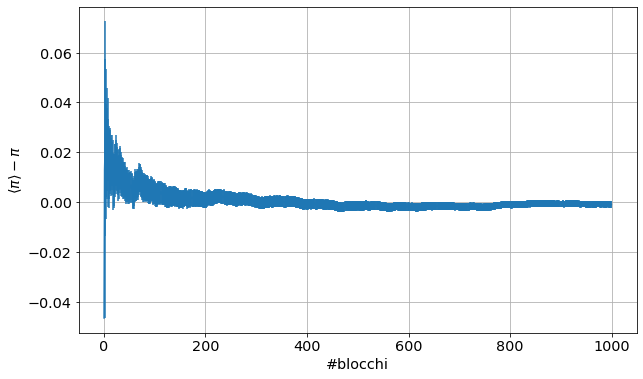

In [8]:
media, sigma_media = np.loadtxt("results/3_1.dat", usecols=(0,1), delimiter=' ', unpack='true')
valor_vero = np.pi
x = np.arange(len(media))
plt.errorbar(x,media-valor_vero,yerr=sigma_media)
plt.xlabel('#blocchi')
plt.ylabel(r'$\langle \pi \rangle - \pi$')
plt.grid(True)
plt.show()

<div style="font-size: 0.43cm;">Utilizzando i valori $L=1$ e $d=1.8$, si sono effettuati $10^5$ tiri per ognuno dei $10^3$ blocchi.
Il risultato finale è stata una stima di $\pi = 3.1405 \pm 0.0013$, compatibile con il valore vero $\pi = 3.14159\dots$

</div>